In [1]:
!pip install wordcloud
!pip install contractions

In [2]:
import pandas as pd
import re
import contractions
import wordcloud
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


STOPWORDS = stopwords.words('english')
STOPWORDS.extend(["game", "netflix", "squidgame", "squid", "episode"])
STEMMER = PorterStemmer()
PUNCTUATIONS = r'[\!\(\)\-\[\]\{\}\;\:\"\\\,\<\>\.\/\?\@\#\$\%\^\&\*\_\~]'


In [3]:
FILE_DIR = "Data"
df = pd.read_csv(f"{FILE_DIR}/tweets_v8.csv")
data = df.loc[:, ["date","text"]]

In [47]:
def cleanText(tweet): 

    tweet_text = tweet.split()

    # remove hashtags
    tweet_no_hash = [t.lower() for t in tweet_text if not re.match(r"#.\w+", t)]
    
    # remove punctuation
    tweet_replace_sym = [re.sub(PUNCTUATIONS, "",t) for t in tweet_no_hash]

    #get words only and fix contarctions
    tweet_words = [contractions.fix(t.lower()) for t in tweet_replace_sym if re.match(r"(\w+)", t)]
    
    words = ' '.join(tweet_words)
    tweet_words =  words.split()

    #remove stop words, stem words
    tweet_no_stop = [STEMMER.stem(t) for t in tweet_words if t not in STOPWORDS]


    #remove links
    tweet_remove_link = [t for t in tweet_no_stop if not re.match(r"^http", t)]
    
    #remove from stop words 
    
    return ' '.join(tweet_remove_link)
    
def getHashtags(tweet): 
    tweet_text = tweet.split()
    hashtags = [t.lower() for t in tweet_text if re.match(r"#.\w+", t)]
    remove_stop_hash = [hashtag for hashtag in hashtags if "squidgame" not in hashtag and "netflix" not in hashtag and "오징어게임" not in hashtag]
    tweet_replace_sym = [re.sub(PUNCTUATIONS, "",t) for t in remove_stop_hash]
    return ' '.join(tweet_replace_sym)


In [48]:
data["text_clean"] = data.text.apply(lambda x: cleanText(x))
data["hashtags"] = data.text.apply(lambda x: getHashtags(x))

In [49]:
fdist = nltk.FreqDist()
for sentence in data.text_clean:
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist[word] += 1

fdist2 = nltk.FreqDist()
for sentence in data.hashtags:
    for word in nltk.tokenize.word_tokenize(sentence):
        fdist2[word] += 1

In [50]:
print (fdist.most_common(10))
print (fdist2.most_common(10))

[('watch', 9452), ('like', 4313), ('project', 3973), ('show', 3569), ('go', 3351), ('one', 3280), ('get', 3172), ('play', 3020), ('finish', 2928), ('game', 2817)]
[('nft', 993), ('halloween', 727), ('halloween2021', 495), ('saebyeok', 477), ('art', 394), ('fanart', 377), ('nfts', 368), ('round6', 339), ('squid', 328), ('kangsaebyeok', 315)]


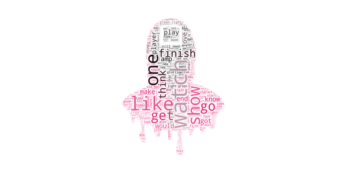

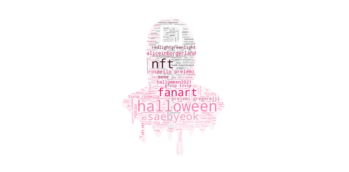

In [51]:

def genWC(df, file_name):
    IMAGE_DIR = "./project/static"

    from PIL import Image
    stopwords = set(STOPWORDS)

    mask = np.array(Image.open(f"{IMAGE_DIR}/squid_mask.png"))

    image_colors = ImageColorGenerator(mask)
    wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="white", max_words=1000, mask=mask).generate(' '.join(df))

    # create word cloud image
    plt.figure()
    plt.axis("off")
    im2 = plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    im1 = plt.imshow(mask, alpha = 0.05)

    # store to file
    plt.savefig(f"{IMAGE_DIR}/{file_name}.png", dpi=300)
    plt.show()


genWC(data.text_clean, "squidgame_text")
genWC(data.hashtags, "squidgame_hashtags")